In [1]:
#Forecasting using series data with the Autoregressive Integrated Moving Average model. 
#Using this model, we can analyze and model time-series data to make future decisions. 
#Some of the applications of Time Series Forecasting are 
#weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc.

In [2]:
#For this project, we will be using Google's stock price list from Yahoo finance. To ensure that our dataset is constantly accurate,since it's avery dynamic dataset; we'd use an API from Yfinance.

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date,timedelta
today=date.today()

d1=today.strftime('%Y-%m-%d')
end_date=d1
d2=date.today()-timedelta(days=365)
d2=d2.strftime('%Y-%m-%d')
start_date=d2

data=yf.download('GOOG',
                start=start_date,
                end=end_date,
                progress=False)

data['Date']= data.index
data=data[['Date','Open','High','Low','Close','Adj Close','Volume']]
data.reset_index(drop=True,inplace=True)
print(data.tail())



          Date        Open        High         Low       Close   Adj Close  \
246 2022-07-18  113.440002  114.800003  109.300003  109.910004  109.910004   
247 2022-07-19  111.730003  114.809998  110.500000  114.620003  114.620003   
248 2022-07-20  114.059998  116.330002  113.260002  114.699997  114.699997   
249 2022-07-21  115.089996  115.209999  111.910004  115.040001  115.040001   
250 2022-07-22  111.809998  113.180000  107.599998  108.360001  108.360001   

       Volume  
246  33354000  
247  30992300  
248  26780100  
249  27267800  
250  44404100  


In [ ]:
#The above code will collect the stock price data from today to the last 360 days.
#In this dataset, Date is not a column, it’s the index of this dataset. 
#To use this data for any data science task, we need to convert this index into a column.

In [5]:
data=data [['Date','Close']]
print(data.head())

        Date       Close
0 2021-07-26  139.644501
1 2021-07-27  136.796494
2 2021-07-28  136.381500
3 2021-07-29  136.540497
4 2021-07-30  135.220993


In [7]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Close   251 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [ ]:
#Let's visualize the close prices

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [11]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

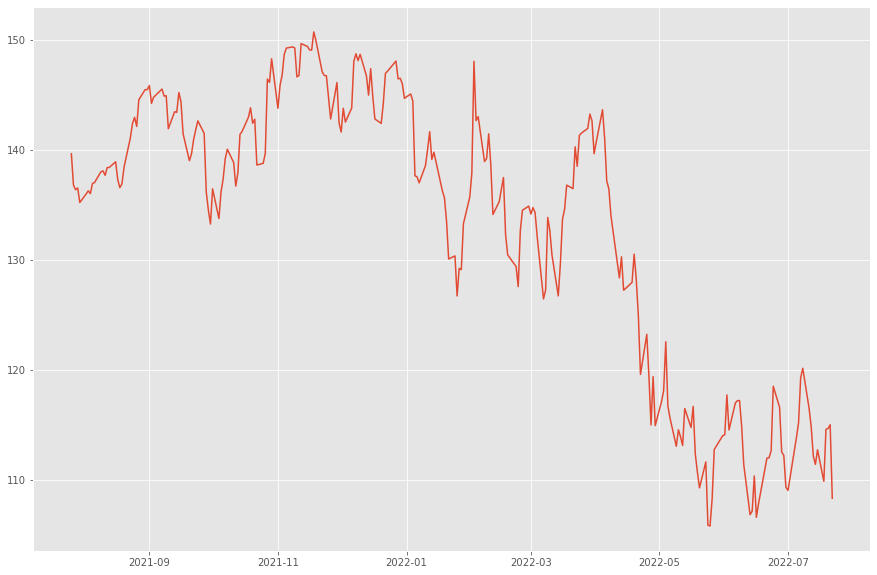

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plt.plot(data['Date'],data ['Close'])

In [17]:
##Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. 
#The data visualization graph about the closing stock prices above shows that our dataset is not stationary.


#To check whether our dataset is stationary or seasonal properly,
#we can use the seasonal decomposition method that splits the time series data into trend, seasonal, 
#and residuals for a better understanding of the time series data:

#If we assume an additive decomposition, then we can write:
 #   yt=St+Tt+Rt

C:\Users\DELL\AppData\Local\Temp/ipykernel_5352/2659134596.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result=seasonal_decompose(data['Close'],


<Figure size 432x288 with 0 Axes>

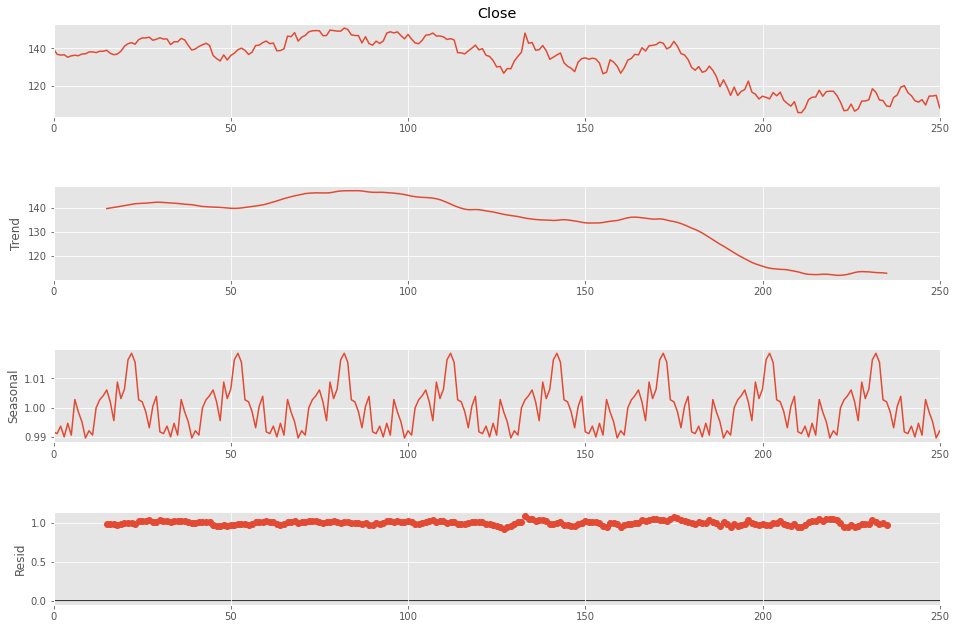

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data['Close'],
                         model='multiplicative', freq=30)

fig=plt.figure()
fig=result.plot()
fig.set_size_inches(15,10)

In [23]:
#From the graph above we can see that the data is  not stationary,it is seasonal. Therefore, the SEASONAL-ARIMA is required.
#This will be in 2 steps: a. Using the ARIMA model before b Using the SARIMA model.

#To the model mobile!

In [24]:
#To use ARIMA or SARIMA, we need to find the p, d, and q values. 
#We can find the value of p by plotting the autocorrelation of the 
#Close column and the value of q by plotting the partial autocorrelation plot. 
#The value of d is either 0 or 1. 
#If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. 
#As our data is seasonal, we should use 1 as the d value.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

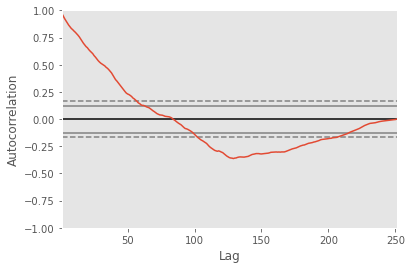

In [25]:
#Find value of p:

pd.plotting.autocorrelation_plot(data['Close'])

In [26]:
#From the above autocorrelation plot above, the curve is moving down after the 5th line of the first boundary. 
#The value of p is 5. 

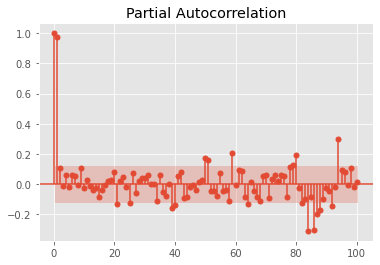

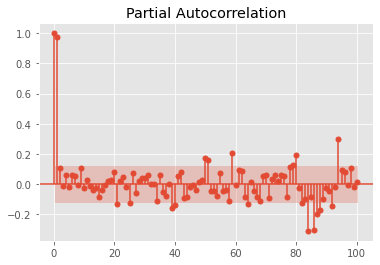

In [27]:
#Find the value of q (moving average):

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [28]:
#From the above partial autocorrelation, 2 points are obeserved as 'outliers'
#Value od q is 2.

In [32]:
#Building an ARIMA Model

p,d,q=5,1,2
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA (data['Close'], order=(p,d,q))
fitted=model.fit(disp=-1)
#print(fitted.summary())

display(fitted.summary())

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -587.227
Method:                       css-mle   S.D. of innovations              2.527
Date:                Mon, 25 Jul 2022   AIC                           1192.455
Time:                        17:26:52   BIC                           1224.148
Sample:                             1   HQIC                          1205.210
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1253      0.049     -2.584      0.010      -0.220      -0.030
ar.L1.D.Close     1.6374      0.366      4.477      0.000       0.921       2.354
ar.L2.D.Close    -0.6070      0.361     -1.683      0.092      -1.314       0.100
ar.L3.D.Close    -0.1321      0.129     -1.022      0.307      -0.385       0.121
ar.L4.D.Close     0.0930      0.135      0.687      0.492      -0.173       0.359
ar.L5.D.Close    -0.0002      0.082     -0.002      0.998      -0.160       0.160
ma.L1.D.Close    -1.7034      0.360     -4.734      0.000      -2.409      -0.998
ma.L2.D.Close     0.7034      0.360      1.955      0.051      -0.002       1.408
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0229           -0.0000j            1.0229           -0.0000
AR.2            1.7198           -0.7226j            1.8654           -0.0633
AR.3            1.7198           +0.7226j            1.8654            0.0633
AR.4           -3.0276           -0.0000j            3.0276           -0.5000
AR.5          600.8883           -0.0000j          600.8883           -0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.4217           +0.0000j            1.4217            0.0000
-----------------------------------------------------------------------------
"""

In [33]:
#Using ARIMA, now predict the values (not a great move since data is seasonal.)

predictions=fitted.predict()
print(predictions)

#p.s These predictions wouldn't fly. THE DATA IS SEASONAL. SO,let's use the Seasonal ARIMA.

2     -0.009233
3     -0.139825
4      0.107505
5      0.139953
6     -0.044676
         ...   
246    0.201807
247    0.422255
248   -0.234769
249    0.243451
250   -0.324719
Length: 249, dtype: float64


In [44]:
#Build SARIMA Model
import statsmodels.api as sm
import warnings
#warnings.filterwarnings('ignore')
#warnings.simplefilter('ignore')


#I usually wouldn't import warnings 
#but I'm trying to provide precauion any 
#developer of situations that aren't necessarily exceptions.
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p,d,q),
                                seasonal_order=(p,d,q,12))

model=model.fit()
#print(model.summary())
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -575.978
Date:                            Mon, 25 Jul 2022   AIC                           1181.957
Time:                                    17:52:37   BIC                           1234.041
Sample:                                         0   HQIC                          1202.948
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0865      0.286      0.302      0.762      -0.474       0.647
ar.L2          0.7736      0.256      3.018      0.003       0.271       1.276
ar.L3         -0.0365      0.088     -0.414      0.679      -0.209       0.136
ar.L4         -0.0570      0.078     -0.732      0.464      -0.209       0.095
ar.L5          0.0893      0.079      1.131      0.258      -0.066       0.244
ma.L1         -0.1407      0.282     -0.500      0.617      -0.693       0.411
ma.L2         -0.7910      0.269     -2.942      0.003      -1.318      -0.264
ar.S.L12      -0.7166      0.625     -1.147      0.251      -1.941       0.508
ar.S.L24       0.1718      0.182      0.946      0.344      -0.184       0.528
ar.S.L36       0.2026      0.203      1.000      0.317      -0.195       0.600
ar.S.L48      -0.0449      0.151     -0.298      0.766      -0.341       0.251
ar.S.L60      -0.1312      0.094     -1.402      0.161      -0.315       0.052
ma.S.L12      -0.2333      0.600     -0.389      0.698      -1.410       0.943
ma.S.L24      -0.6982      0.726     -0.961      0.336      -2.122       0.726
sigma2         6.5854      1.240      5.312      0.000       4.156       9.015
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.75
Prob(Q):                              1.00   Prob(JB):                         0.06
Heteroskedasticity (H):               2.41   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
#Finally, predict future stock prices using SARIMA for one month

predictions=model.predict(len(data), len(data)+30)

print(predictions)

251    108.233593
252    110.003779
253    110.070581
254    110.945663
255    110.883606
256    110.638087
257    109.362893
258    109.578375
259    108.173215
260    107.881270
261    109.277871
262    109.187330
263    109.767183
264    110.820200
265    110.099675
266    109.535383
267    109.299725
268    109.258342
269    108.364114
270    108.232552
271    108.814630
272    108.919278
273    109.160473
274    108.582878
275    109.007954
276    109.004605
277    109.144372
278    108.293918
279    106.685851
280    106.406049
281    106.757926
Name: predicted_mean, dtype: float64


<AxesSubplot:>

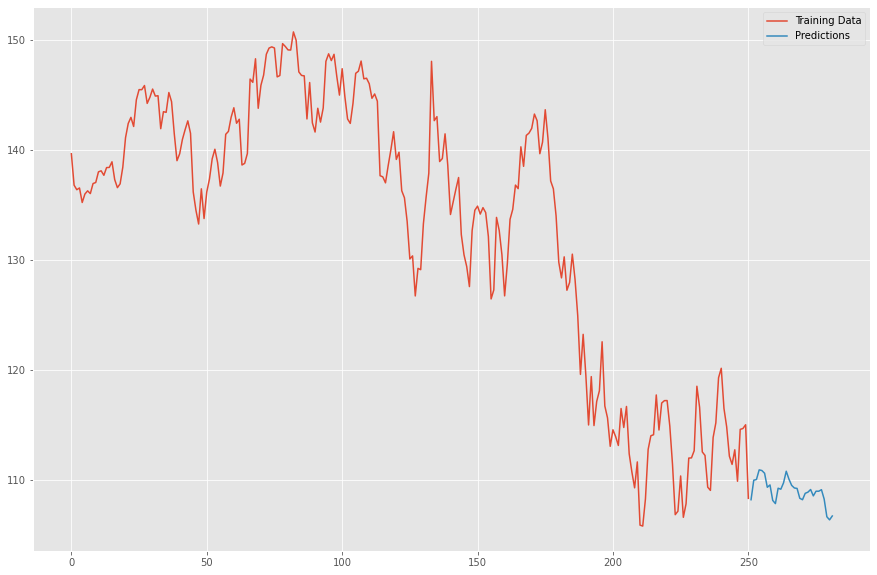

In [47]:
#Vizualize predictions
data['Close'].plot(legend=True, label="Training Data", figsize=(15,10))

predictions.plot(legend=True,label='Predictions')

In [ ]:
#And that's a wrap!
#We have been able to predict the closing amount for the next one month!

#Do let me know when you buy that stock!